# Analysis of a sample image of oil spill

## References:


1.   [A Review of Oil Spill Remote Sensing](https://www.mdpi.com/1424-8220/18/1/91)
2.   [Algorithm to Estimate Oil Spill Area Using Digital Properties of Image](https://www.joet.org/journal/view.php?number=2951)


## Summary of Approach:

Oil Spill analysis using visual imaging is cheap and effective, given favourable visibility, weather & light conditions. Assuming such conditions, oil spill can be typically spotted as a thin coat of silver surrounded by a rainbow or black/brown in color depending on the thickness of the oil in a given area. Using multispectral imaging like visual, thermal and SAR is recommended to help mitigate effect of environmental factors.

I will focus on using visual imaging i.e. RGB images to analyze if:

1.  Oil spill exists in the images
2. Extent of oil spill


In [1]:
!ls -lh

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

total 96K
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 sample_data
-rw-r--r-- 1 root root  90K Jun  5 09:23 spill_oil.jpg


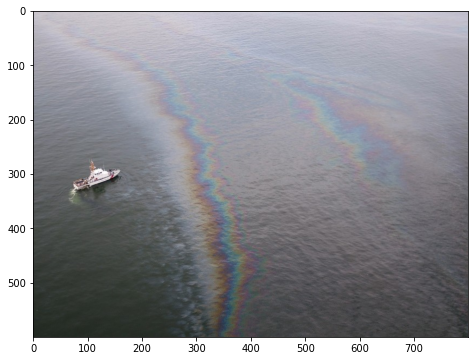

In [8]:
im = cv2.cvtColor(cv2.imread('spill_oil.jpg'), cv2.COLOR_BGR2RGB)

plt.figure(1, figsize=(8, 6))
plt.imshow(im)
plt.show()

## Image Analysis

### Denoising the Image

Image filtering is used to reduce the noise in the image using Blur, Gaussian Blur and Median filters, using kernel size of 5.

Kernal size is set to 5, as it offers the best balance between distinct colors while reducing the effect of sun light reflected off by the water. 

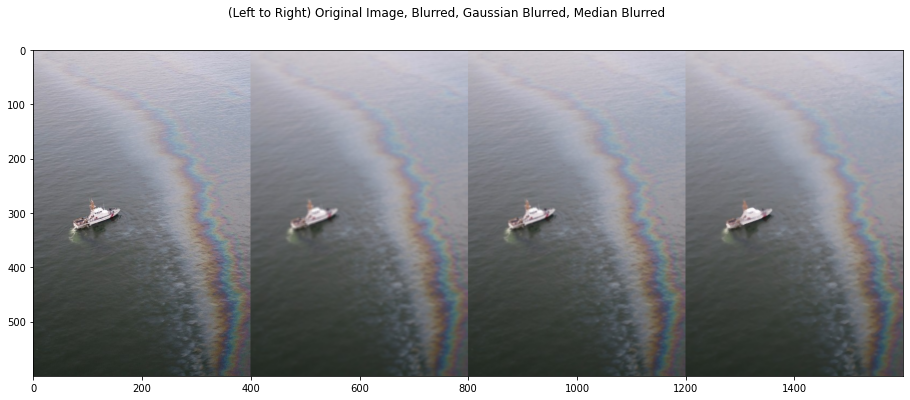

In [31]:
left_im = im[:, :400].copy()

K = 5
blur_im = cv2.blur(left_im, (K, K))
gblur_im = cv2.GaussianBlur(left_im, (K, K), 0)
mblur_im = cv2.medianBlur(left_im, K)
new_im = cv2.hconcat([left_im, blur_im, gblur_im, mblur_im])

plt.figure(1, figsize=(24, 6))
plt.suptitle('(Left to Right) Original Image, Blurred, Gaussian Blurred, Median Blurred')
plt.imshow(new_im)
plt.show()

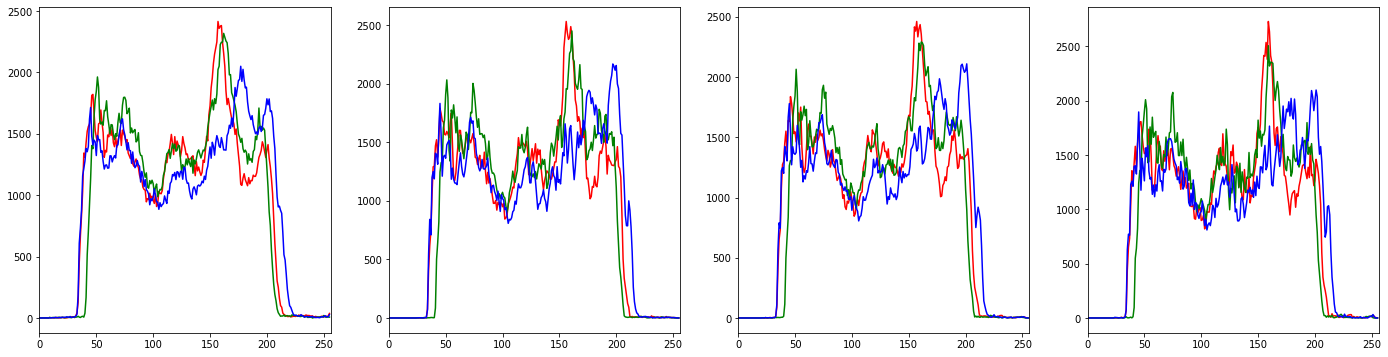

In [32]:
color = ('r','g','b')
plt.figure(figsize=(24, 6))
for i, img in enumerate([left_im, blur_im, gblur_im, mblur_im]):
  plt.subplot(1,4,i+1)
  for i,col in enumerate(color):
      histr = cv2.calcHist([img],[i],None,[256],[0,256])
      plt.plot(histr,color = col)
      plt.xlim([0,256])
plt.show()

From the above samples, it seems like plain Blur applied is causing the maximum distortion to both the edges/contours of the oil spill while also causing a decrease in the overall saturation of colors. 

Going forward, we can use either median blur or gaussian blur on our images.

### Binarizing the Images

Lets see if binarizing the images will help in segmenting the area of oil spills.

We will compare Manual Thresholding, OTSU and Adaptive Thresholding on Gaussian Blurred and Median Blurred Images.

In [47]:
# On median blurred images
K = 13
im2 = im.copy()
median_im = cv2.cvtColor(cv2.medianBlur(im2, K), cv2.COLOR_RGB2GRAY)
gaussian_im = cv2.cvtColor(cv2.GaussianBlur(im2, (K,K), 0), cv2.COLOR_RGB2GRAY)

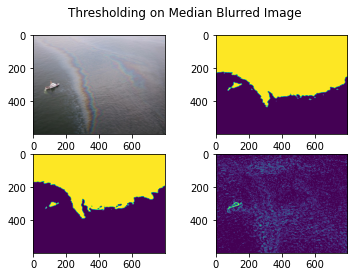

In [48]:
plt.figure(1)
plt.suptitle('Thresholding on Median Blurred Image')
plt.subplot(2,2,1)
plt.imshow(im2)
plt.subplot(2,2,2)
otsu_thres, otsu_im = cv2.threshold(median_im, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu_im)
plt.subplot(2,2,3)
tri_thres, tri_im = cv2.threshold(median_im, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
plt.imshow(tri_im)
plt.subplot(2,2,4)
adp_im = cv2.adaptiveThreshold(median_im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 0)
plt.imshow(adp_im)
plt.show()